In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load Boston Housing dataset from keras datasets
from tensorflow.keras.datasets import boston_housing

# Load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)


In [3]:
# Standardizing features (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Building the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single neuron output (because it's regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 563.7537 - mae: 21.9452 - val_loss: 589.5886 - val_mae: 22.5552
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 513.3786 - mae: 20.8204 - val_loss: 538.2820 - val_mae: 21.4190
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 471.3380 - mae: 19.6829 - val_loss: 475.3044 - val_mae: 19.9485
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 430.7456 - mae: 18.5239 - val_loss: 395.9203 - val_mae: 17.9924
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 318.7681 - mae: 15.8958 - val_loss: 302.2562 - val_mae: 15.3998
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 244.4084 - mae: 13.4865 - val_loss: 202.5294 - val_mae: 12.1338
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 138.7065 - mae: 9.8622 - val_loss: 117.7230 - val_mae: 8.4798
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.6312 - mae: 6.8484 - val_loss: 71.5567 - val_mae: 6.3112
Epoch 9/100
11/11 

In [6]:
# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")


4/4 - 0s - 15ms/step - loss: 26.1523 - mae: 3.1021
Test Loss (MSE): 26.15
Test MAE: 3.10


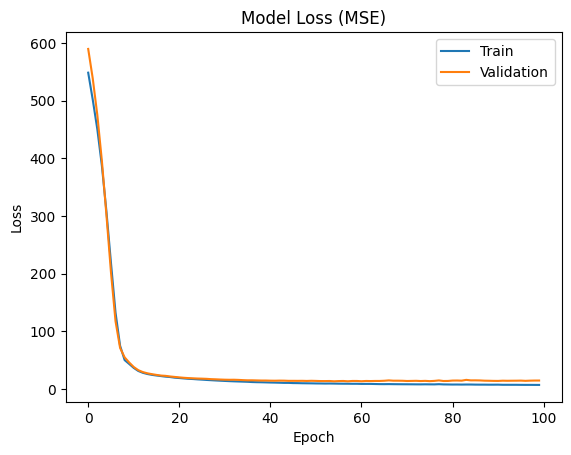

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [8]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Display first 5 predictions vs actual prices
for i in range(5):
    print(f"Predicted Price: {predictions[i][0]:.2f}, Actual Price: {y_test[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Price: 7.86, Actual Price: 7.2
Predicted Price: 18.54, Actual Price: 18.8
Predicted Price: 21.08, Actual Price: 19.0
Predicted Price: 32.24, Actual Price: 27.0
Predicted Price: 25.01, Actual Price: 22.2
